## Restaurant Chains

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Om/Downloads/tasks.csv")

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Identify Restaurant Chains

In [4]:
chain_counts = df['Restaurant Name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1]

In [5]:
df_chains = df[df['Restaurant Name'].isin(restaurant_chains.index)]

## Analyse Ratings And Popularity Of Chains

In [6]:
chain_analysis = df_chains.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'City': 'nunique',
    'Restaurant ID': 'count'
}).rename(columns={
    'Aggregate rating': 'Average Rating',
    'Votes': 'Total Votes',
    'City': 'Cities Present',
    'Restaurant ID': 'Total Branches'
}).sort_values(by='Total Votes', ascending=False)

In [7]:
print("\nTop 10 Restaurant Chains by Popularity (Votes):\n")
print(chain_analysis.head(10))


Top 10 Restaurant Chains by Popularity (Votes):

                           Average Rating  Total Votes  Cities Present  \
Restaurant Name                                                          
Barbeque Nation                  4.353846        28142              22   
AB's - Absolute Barbecues        4.825000        13400               3   
Big Chill                        4.475000        10853               1   
Farzi Cafe                       4.366667        10098               6   
Truffles                         3.950000         9682               2   
Chili's                          4.580000         8156               4   
Joey's Pizza                     4.250000         7807               1   
Big Yellow Door                  4.266667         7511               1   
Saravana Bhavan                  4.133333         7238               1   
Starbucks                        3.805556         7139               4   

                           Total Branches  
Restaurant Name  

In [8]:
top10 = chain_analysis.head(10)

## Plot Average Ratings Of Top 10 Chains

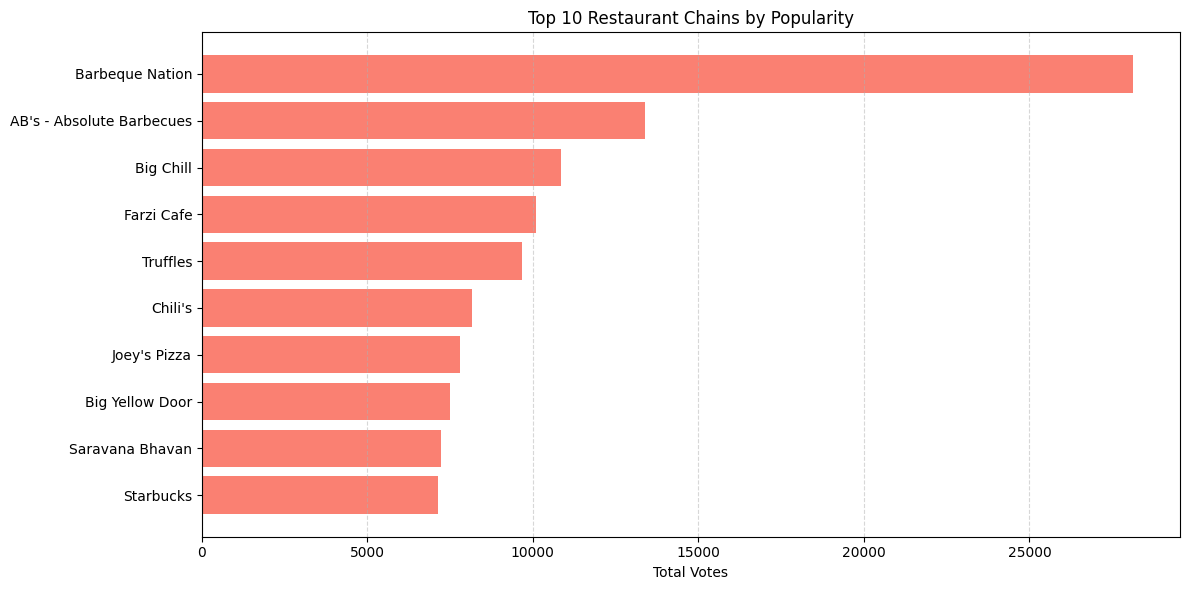

In [9]:
plt.figure(figsize=(12, 6))
plt.barh(top10.index[::-1], top10['Total Votes'][::-1], color='salmon')
plt.xlabel("Total Votes")
plt.title("Top 10 Restaurant Chains by Popularity")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

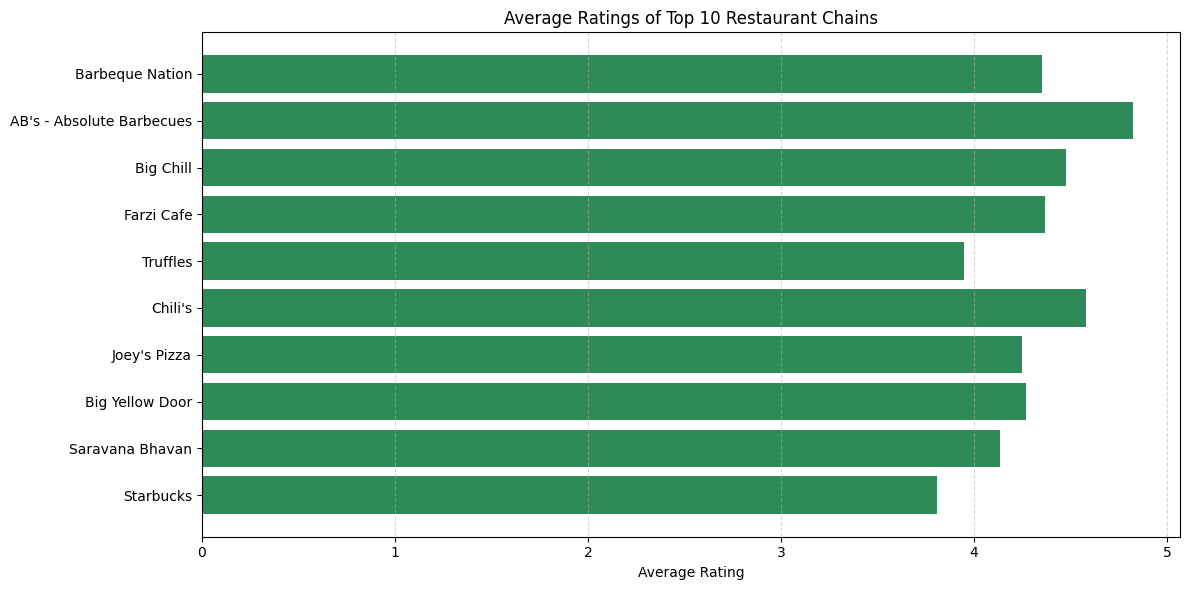

In [10]:
plt.figure(figsize=(12, 6))
plt.barh(top10.index[::-1], top10['Average Rating'][::-1], color='seagreen')
plt.xlabel("Average Rating")
plt.title("Average Ratings of Top 10 Restaurant Chains")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()